In [50]:
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

%matplotlib inline

coffee = pd.read_csv('./updated_coffee_df.csv')
coffee.head()



coffee['Date'] = pd.to_datetime(coffee['Date'])
coffee = coffee.set_index("Date")

coffee_shift_df = pd.concat([coffee[['Title']].shift(1),coffee[['Rate_of_Change']].shift(1), coffee[['Price']]],axis=1)
coffee_shift_df.dropna(inplace=True)
coffee_shift_df.head()



X = coffee_shift_df['Title']
y = coffee_shift_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()

# list of text documents -> coffee['Tokenized']

# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab
vectorizer.fit(X_train)

# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

# encode document
X_train_vector = vectorizer.transform(X_train)
X_test_vector = vectorizer.transform(X_test)
# summarize encoded vector
# print(vector.shape)
# print(vector.toarray())


X_train_scaled = ss.fit_transform(X_train_vector.toarray())
X_test_scaled = ss.transform(X_test_vector.toarray())
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape: ", X_test_scaled.shape)





model = Sequential()
model.add(Dense(45, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(.50))
model.add(Dense(15, activation='relu'))#adds a second layer. 
model.add(Dropout(.25))
model.add(Dense(1))#LAST OUTPUT NEURON HAS TO BE ONE, NO ACTIVATION FUNCTION. 

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=150)
#all of this should be in one cell.

model.summary()

history.history.keys()

plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.legend()

In [124]:
vectorizer = TfidfVectorizer()

In [158]:
# list of text documents -> coffee['Tokenized']

# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab
vectorizer.fit(X_train)

# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

# encode document
X_train_vector = vectorizer.transform(X_train)
X_test_vector = vectorizer.transform(X_test)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train_vector.toarray())
X_test_scaled = ss.transform(X_test_vector.toarray())



{'ice': 1430, 'us': 3044, 'review': 2379, 'cocoa': 607, 'eases': 946, 'large': 1599, 'arabica': 251, 'volumes': 3088, 'pending': 2038, 'grading': 1298, 'on': 1934, 'indonesian': 1481, 'robusta': 2415, 'shipments': 2545, 'down': 890, 'by': 471, 'nearly': 1858, 'third': 2889, 'ugandan': 2989, 'coffee': 611, 'exports': 1057, 'rise': 2403, '63': 92, 'in': 1464, 'september': 2515, 'indonesia': 1480, 'fell': 1118, '28': 55, 'october': 1915, 'futures': 1246, 'hits': 1389, 'fresh': 1216, 'five': 1154, 'month': 1824, 'low': 1702, 'global': 1279, 'climb': 593, 'to': 2918, 'record': 2285, 'high': 1377, 'sugar': 2787, 'close': 596, 'at': 279, 'four': 1206, 'week': 3130, 'highs': 1381, 'boost': 397, 'nestlé': 1872, 'india': 1475, 'sales': 2455, 'lower': 1703, 'weakening': 3124, 'demand': 806, 'fo': 1178, 'licht': 1644, 'sees': 2500, 'crop': 729, 'vietnam': 3071, '2012': 36, '13': 14, 'nestle': 1871, 'build': 444, 'new': 1876, 'plant': 2082, 'dubai': 925, 'indian': 1476, 'production': 2184, 'pegged'

/opt/conda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [126]:
vector.shape

(1, 3671)

In [127]:
# Keras Tokenization 
# define documents
docs = coffee['Title']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

OrderedDict([('india', 69), ('earns', 3), ('more', 97), ('from', 115), ('higher', 187), ('coffee', 2287), ('exports', 477), ('in', 779), ('2006', 10), ('friesland', 3), ('raises', 27), ('stake', 4), ('indonesian', 74), ('subsidiary', 2), ('milk', 144), ('product', 118), ('prices', 379), ('europe', 10), ('and', 197), ('the', 79), ('us', 842), ('jan', 1), ('3', 27), ('starbucks', 47), ('reveals', 4), ('trans', 2), ('fat', 3), ('removal', 1), ('plan', 23), ('shipments', 158), ('stable', 7), ('after', 59), ('floods', 4), ('nymex', 1), ('announces', 8), ('start', 22), ('date', 1), ('for', 270), ('soft', 31), ('commodity', 34), ('futures', 277), ('contracts', 14), ('nybot', 8), ('mourns', 1), ('loss', 5), ('of', 283), ('president', 5), ('chief', 12), ('executive', 2), ('harry', 1), ('falk', 1), ("india's", 12), ('largest', 4), ('chain', 7), ('extends', 10), ('to', 894), ('pakistan', 1), ('honduran', 32), ('sales', 130), ('ugandan', 62), ('funds', 8), ('soyabean', 11), ('market', 108), ('wron

In [128]:
encoded_docs.shape

(1458, 3814)

In [129]:
# define training data
sentences = coffee['Tokenized']
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['India'])


Word2Vec(vocab=4441, size=100, alpha=0.025)
['India', 'earns', 'more', 'from', 'higher', 'coffee', 'exports', 'in', '2006', 'Friesland', 'raises', 'stake', 'Indonesian', 'subsidiary', 'MILK', 'PRODUCT', 'PRICES', 'IN', 'EUROPE', 'AND', 'THE', 'US', 'Milk', 'product', 'prices', ',', 'Jan', '3', 'Starbucks', 'reveals', 'trans', 'fat', 'removal', 'plan', 'shipments', 'stable', 'after', 'floods', 'Nymex', 'announces', 'start', 'date', 'for', 'soft', 'commodity', 'futures', 'contracts', 'Nybot', 'mourns', 'loss', 'of', 'president', 'and', 'chief', 'executive', 'Harry', 'Falk', "'s", 'largest', 'chain', 'extends', 'to', 'Pakistan', 'Honduran', 'sales', 'Ugandan', 'funds', 'Soyabean', 'market', 'wrong', 'foots', 'many', 'traders', 'Weather', 'Costa', 'Rican', 'Indian', 'Coffee', 'Board', 'highlights', 'rise', 'Colombia', 'overcomes', 'worst', 'its', 'crisis', 'McDonald', 'be', 'certified', 'as', 'sustainable', 'January', '10', 'Peru', 'beats', 'export', 'estimates', 'Fall', 'crude', 'sees', '

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


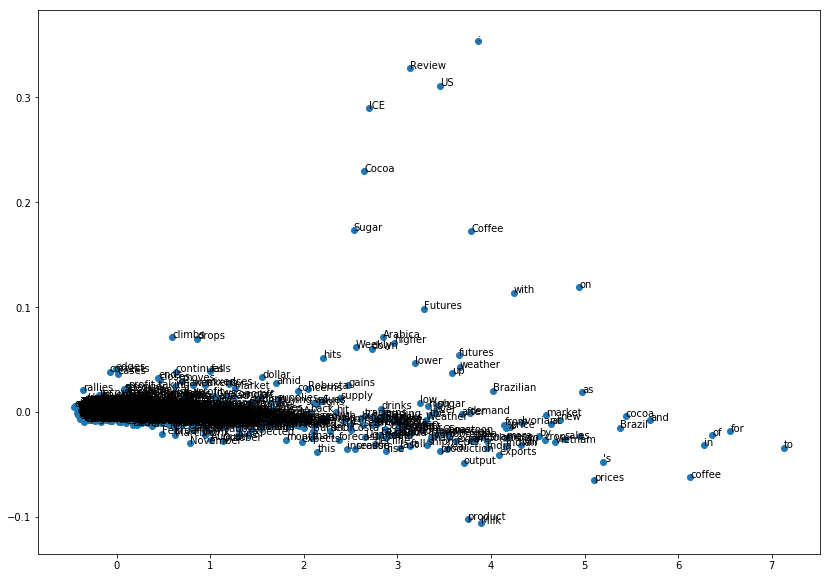

In [130]:

# define training data
sentences = coffee['Tokenized']
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2D PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.figure(figsize = (14,10))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))


In [131]:
encoded_docs.shape

(1458, 3814)

In [132]:
layer = Embedding(3814, 1458)

In [133]:
# define problem
vocab_size = 3814
max_length = 1458
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 1458, 8)           30512     
_________________________________________________________________
flatten_25 (Flatten)         (None, 11664)             0         
_________________________________________________________________
dense_42 (Dense)             (None, 6)                 69990     
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 7         
Total params: 100,509
Trainable params: 100,509
Non-trainable params: 0
_________________________________________________________________
None


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [135]:
X = coffee[['Title', 'Date', 'Price_Change', 'Rate_of_Change']]
y = coffee['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [136]:
# Keras Tokenization 
# define documents
docs = coffee['Title']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)


OrderedDict([('india', 69), ('earns', 3), ('more', 97), ('from', 115), ('higher', 187), ('coffee', 2287), ('exports', 477), ('in', 779), ('2006', 10), ('friesland', 3), ('raises', 27), ('stake', 4), ('indonesian', 74), ('subsidiary', 2), ('milk', 144), ('product', 118), ('prices', 379), ('europe', 10), ('and', 197), ('the', 79), ('us', 842), ('jan', 1), ('3', 27), ('starbucks', 47), ('reveals', 4), ('trans', 2), ('fat', 3), ('removal', 1), ('plan', 23), ('shipments', 158), ('stable', 7), ('after', 59), ('floods', 4), ('nymex', 1), ('announces', 8), ('start', 22), ('date', 1), ('for', 270), ('soft', 31), ('commodity', 34), ('futures', 277), ('contracts', 14), ('nybot', 8), ('mourns', 1), ('loss', 5), ('of', 283), ('president', 5), ('chief', 12), ('executive', 2), ('harry', 1), ('falk', 1), ("india's", 12), ('largest', 4), ('chain', 7), ('extends', 10), ('to', 894), ('pakistan', 1), ('honduran', 32), ('sales', 130), ('ugandan', 62), ('funds', 8), ('soyabean', 11), ('market', 108), ('wron

In [147]:
# define problem
vocab_size = 3814
max_length = 1458
# define the model
model = Sequential()
model.add(Embedding(input_dim=(1458), output_dim=1458, input_length=max_length))
model.add(Flatten())
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 1458, 1458)        2125764   
_________________________________________________________________
flatten_28 (Flatten)         (None, 2125764)           0         
_________________________________________________________________
dense_48 (Dense)             (None, 4)                 8503060   
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 5         
Total params: 10,628,829
Trainable params: 10,628,829
Non-trainable params: 0
_________________________________________________________________
None


In [144]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 1458, 1458)        2125764   
_________________________________________________________________
flatten_27 (Flatten)         (None, 2125764)           0         
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 8503060   
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 5         
Total params: 10,628,829
Trainable params: 10,628,829
Non-trainable params: 0
_________________________________________________________________


In [145]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

ValueError: Error when checking input: expected embedding_33_input to have shape (1458,) but got array with shape (4,)